# **Computational Methods**
## **Optimization**

Written by Niv Keren, nivkeren1@mail.tau.ac.il 

Based on [SciPy Optimization Tutorial](https://docs.scipy.org/doc/scipy/reference/tutorial/optimize.html#global-optimization),

*Computational Methods* class: 0341-2300

2020/Semester I; Tuesdays 14:00-16:00

FACULTY OF EXACT SCIENCES | GEOPHYSICS & PLANETARY SCIENCES  
Tel Aviv University

---
**Mathematical optimization** or mathematical programming is the selection of a best element (with regard to some criterion) from some set of available alternatives.

Many of the examples now will use the `humps` function

In [9]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [15, 6.67]

In [5]:
def humps(x):
    return 1 / ((x - 0.3)**2 + .01) + 1 / ((x - .9)**2 + .04) - 6

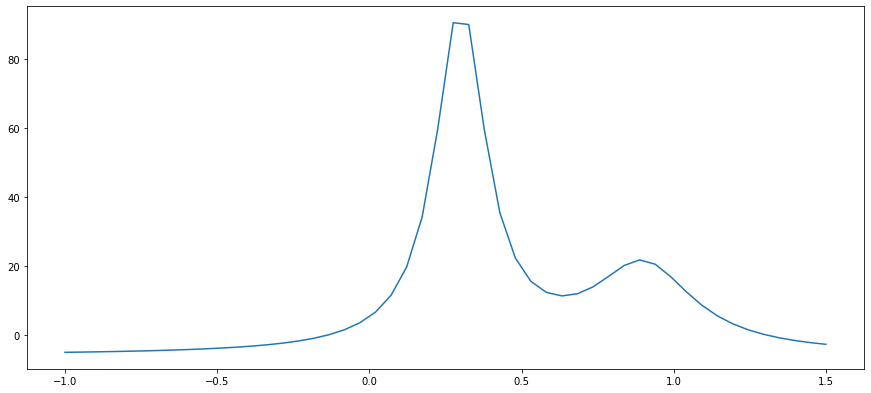

In [77]:
x = np.linspace(-1, 1.5, 50)
y = humps(x)
plt.plot(x, y)
plt.show()

Sometimes we need to pass functions as arguments to other functions. For that we need a way to treat functions as variables.

An example of a "functions function" is [`scipy.optimize.root()`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.root_scalar.html#scipy.optimize.root_scalar):   \
Let's find roots of a one-dimensional equation (not necessarily polynomial, which we can solve using the function `np.roots()`)

In order to solve the equation we will use the function `root()`. `root()` needs an initial guess.  
Suppose we know that a root exists near `x0 = 1.4` or `x1 = 2` as a second guess.

In [71]:
from scipy.optimize import root
sol = root(humps, x0=1.4)
print(sol)

sol.x

    fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 9
     qtf: array([1.46842538e-11])
       r: array([22.01281495])
  status: 1
 success: True
       x: array([1.29954968])


array([1.29954968])

We can also experiment with other initial guesses.

In [173]:
sol = root(humps, x0=6.5)
sol.x

array([1.29954968])

An initial guess of 0.6 will produce another 
root of the function.

In [73]:
sol = root(humps, x0=0.2)
print(sol.x)
sol = root(humps, x0=0)
print(sol.x)

[-0.13161802]
[-0.13161802]


Let's get back to [`root`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.root.html#scipy.optimize.root):
One of the functions parameters is *method*. We can choose the type of solver out of the listed options.  
Each option need different intial parameters to start to solve for the roots.

The defult solver is `hybr` - MINPACK’s hybrd and hybrj routines (modified Powell method).
This rotine needs an inital geuss and find the closest root

In [219]:
sol = root(humps)

TypeError: root() missing 1 required positional argument: 'x0'

Another solver is `krylov`

In [224]:
sol = root(humps, method='krylov', x0=0.0)
sol

     fun: array([1.87602125e-06])
 message: 'A solution was found at the specified tolerance.'
     nit: 5
  status: 1
 success: True
       x: array(-0.13161794)

There are other root solving methods that require different parameters to intialize rotine. [see documantation](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.root.html#scipy.optimize.root)

---
### **Curve Fit**
We can define an exponential function. The is defined by the three arguments.

In [145]:
from scipy.optimize import curve_fit

In [121]:
def exp(x, a, b, c):
    return a*np.exp(b*x) + c

We can add random noise to the functions original values, and try to reproduce the functions original arguments.

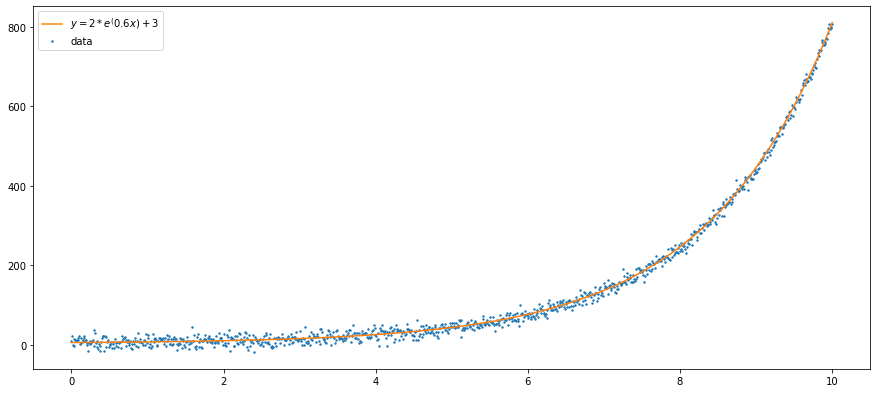

In [144]:
a, b, c = 2, 0.6, 3
x = np.linspace(0, 10, 1000)
y = exp(x, a, b, c)
y_pertubate = y + np.random.normal(0, 10, y.shape[0])
plt.scatter(x, y_pertubate, s=2, color='C0', label="data")
plt.plot(x, y, color='C1', label=f"$y={a} * e^({b}x) + {c}$")
plt.legend()
plt.show()

To fit the data to the function we can use [`scipy.optimize.curve_fit()`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html).  \
`curve_fit` uses non-linear least squares to fit a function, f, to data.  
Not like polyfit or interpolation we can try to fit any kind of function in this example an exponential function.

In [146]:
popt, pcov = curve_fit(exp, x, y_pertubate)
popt

array([1.93778494, 0.60307436, 3.52211492])

We can plot the original function against the the fitted function

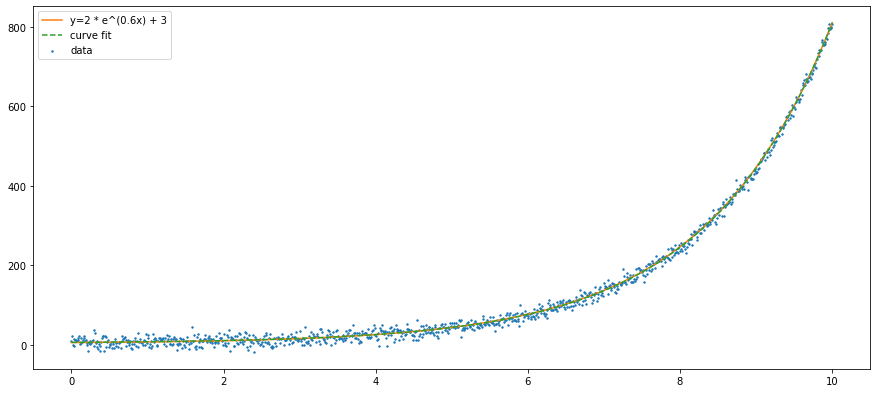

In [147]:
plt.scatter(x, y_pertubate, s=2, color='C0', label="data")
plt.plot(x, y, 'C1', label=f"y={a} * e^({b}x) + {c}")
plt.plot(x, exp(x, popt[0], popt[1], popt[2]), '--C2', label="curve fit")
plt.legend()
plt.show()

---
### **One Dimensional Minimization**

The function [`scipy.optimize.minimize_scalar()`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize_scalar.html#scipy.optimize.minimize_scalar) finds the minimum
value of a one-dimensional function.

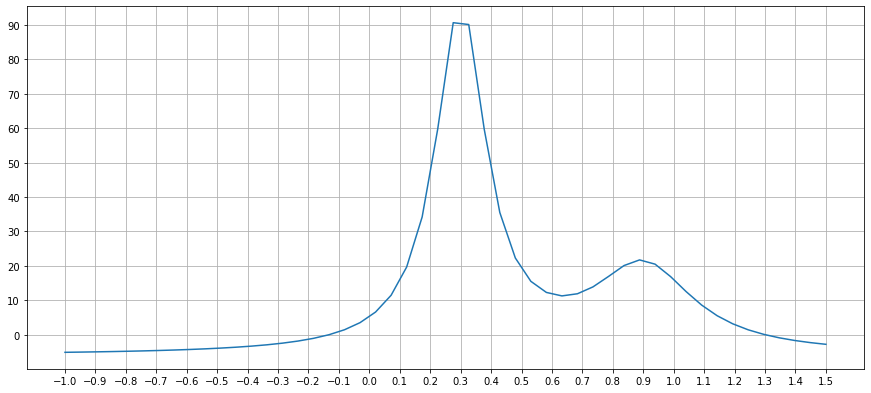

In [205]:
x = np.linspace(-1, 1.5, 50)
y = humps(x)
plt.plot(x, y)
plt.yticks(np.arange(0, 100, 10))
plt.xticks(np.arange(-1, 1.6, 0.1))
plt.grid()
plt.show()

In [181]:
from scipy.optimize import minimize_scalar

In [194]:
res = minimize_scalar(humps)
print(res)
res.x, humps(res.x)

     fun: -6.0
    nfev: 111
     nit: 35
 success: True
       x: -111097479.90657699


(-111097479.90657699, -6.0)

We can use the `bounded` method to find the minimum in a limited area.

In [206]:
res = minimize_scalar(humps, bounds=(0.7, 0.8), method='bounded')
print(res.x, humps(res.x))
res = minimize_scalar(humps, bounds=(0.5, 0.7), method='bounded', tol=1e-3)
print(res.x, humps(res.x))
res = minimize_scalar(humps, bounds=(0.5, 0.8), method='bounded', tol=1e-1)
print(res.x, humps(res.x))

0.7000066106961352 12.382583125645105
0.6369062401536192 11.252757335365125
0.6479231458242048 11.288492837182645


---
### **Global optimization**
Global optimization aims to find the global minimum of a function within given bounds, in the presence of potentially many local minima.  
Typically, global minimizers efficiently search the parameter space, while using a local minimizer (e.g., `minimize()` or `minimize_scalar()`) under the hood.  
SciPy contains a number of good global optimizers. Here, we’ll use those on the same objective function, namely the eggholder function:

In [208]:
def eggholder(x):
    return (-(x[1] + 47) * np.sin(np.sqrt(abs(x[0]/2 + (x[1]  + 47))))
            -x[0] * np.sin(np.sqrt(abs(x[0] - (x[1]  + 47)))))

bounds = [(-512, 512), (-512, 512)]

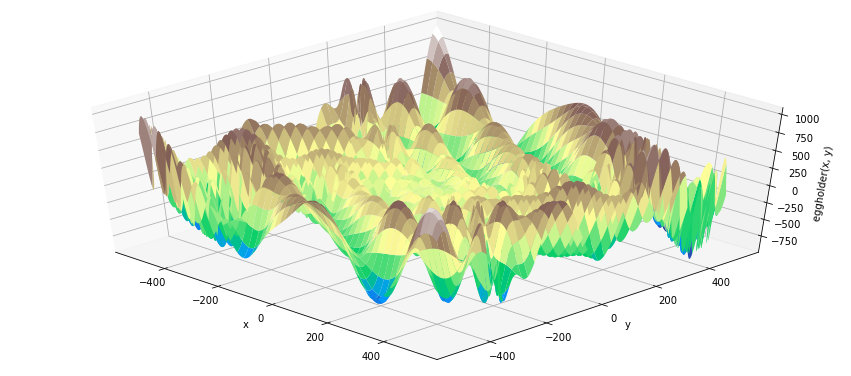

In [209]:
from mpl_toolkits.mplot3d import Axes3D

x = np.arange(-512, 513)
y = np.arange(-512, 513)
xgrid, ygrid = np.meshgrid(x, y)
xy = np.stack([xgrid, ygrid])

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.view_init(45, -45)
ax.plot_surface(xgrid, ygrid, eggholder(xy), cmap='terrain')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('eggholder(x, y)')
plt.show()

We now use the global optimizers to obtain the minimum and the function value at the minimum.  
We’ll store the results in a dictionary so we can compare different optimization results later.

In [225]:
from scipy.optimize import shgo, dual_annealing, differential_evolution, basinhopping
results = dict()
results['shgo'] = shgo(eggholder, bounds) # SHGO stands for “simplicial homology global optimization”.
results['shgo']

     fun: -935.3379515605128
    funl: array([-935.33795156])
 message: 'Optimization terminated successfully.'
    nfev: 55
     nit: 2
   nlfev: 50
   nlhev: 0
   nljev: 10
 success: True
       x: array([439.48097806, 453.97741934])
      xl: array([[439.48097806, 453.97741934]])

In [226]:
results['DA'] = dual_annealing(eggholder, bounds)
results['DA']

     fun: -894.5789003905104
 message: ['Maximum number of iteration reached']
    nfev: 4094
    nhev: 0
     nit: 1000
    njev: 0
  status: 0
 success: True
       x: array([-465.69412412,  385.71669448])

All optimizers return an `OptimizeResult`, which in addition to the solution contains information on the number of function evaluations, whether the optimization was successful, and more.

In [215]:
results['DE'] = differential_evolution(eggholder, bounds)
results['BH'] = basinhopping(eggholder, bounds)

`shgo` has a second method, which returns all local minima rather than only what it thinks is the global minimum:

In [217]:
results['shgo_sobol'] = shgo(eggholder, bounds, n=200, iters=5, sampling_method='sobol')

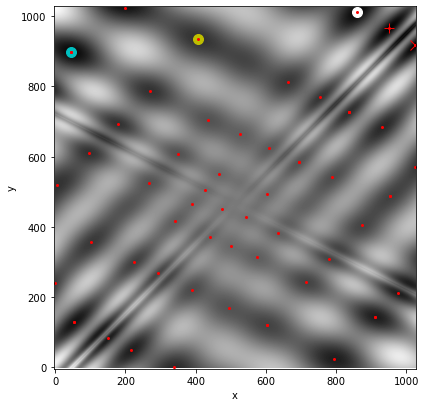

In [218]:
fig = plt.figure()
ax = fig.add_subplot(111)
im = ax.imshow(eggholder(xy), interpolation='bilinear', origin='lower', cmap='gray')
ax.set_xlabel('x')
ax.set_ylabel('y')
def plot_point(res, marker='o', color=None):
    ax.plot(512+res.x[0], 512+res.x[1], marker=marker, color=color, ms=10)

plot_point(results['BH'], color='y')  # basinhopping           - yellow
plot_point(results['DE'], color='c')  # differential_evolution - cyan
plot_point(results['DA'], color='w')  # dual_annealing.        - white

# SHGO produces multiple minima, plot them all (with a smaller marker size)
plot_point(results['shgo'], color='r', marker='+')
plot_point(results['shgo_sobol'], color='r', marker='x')
for i in range(results['shgo_sobol'].xl.shape[0]):
    ax.plot(512 + results['shgo_sobol'].xl[i, 0],
            512 + results['shgo_sobol'].xl[i, 1],
            'ro', ms=2)

ax.set_xlim([-4, 514*2])
ax.set_ylim([-4, 514*2])
plt.show()